In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline

# 데이터셋 로드

In [11]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 학습, 예측 데이터셋 나누기

In [18]:
split_count = int(df.shape[0]*0.8)
split_count

614

In [76]:
#train, test
df = sk.utils.shuffle(df) # 행 섞기.
train = df[:split_count].copy()
test = df[split_count:].copy()

# 학습, 예측에 사용할 컬럼

In [77]:
feature_names = train.columns[:-1].tolist()
label_name = train.columns[-1]

# 학습, 예측 데이터셋 만들기

In [78]:
X_train = train[feature_names]
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
545,8,186,90,35,225,34.5,0.423,37
673,3,123,100,35,240,57.3,0.880,22
347,3,116,0,0,0,23.5,0.187,23
638,7,97,76,32,91,40.9,0.871,32
61,8,133,72,0,0,32.9,0.270,39


In [79]:
y_train = train[label_name]
y_train.head()

545    1
673    0
347    0
638    1
61     1
Name: Outcome, dtype: int64

In [80]:
# 실전시험문제를 만들자.
X_test = test[feature_names]
y_test = test[label_name]
y_test.head()

343    0
490    0
710    0
355    1
35     0
Name: Outcome, dtype: int64

# linear regression

In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [82]:
pred = model.predict(X_test)
model.score(X_test,y_test)

0.26774009492361095

# Decision tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
y_predict = model.predict(X_test)
sum(model.predict(X_test) == y_test)/len(X_test)

0.7662337662337663

In [85]:
model.score(X_test,y_test)

0.7662337662337663

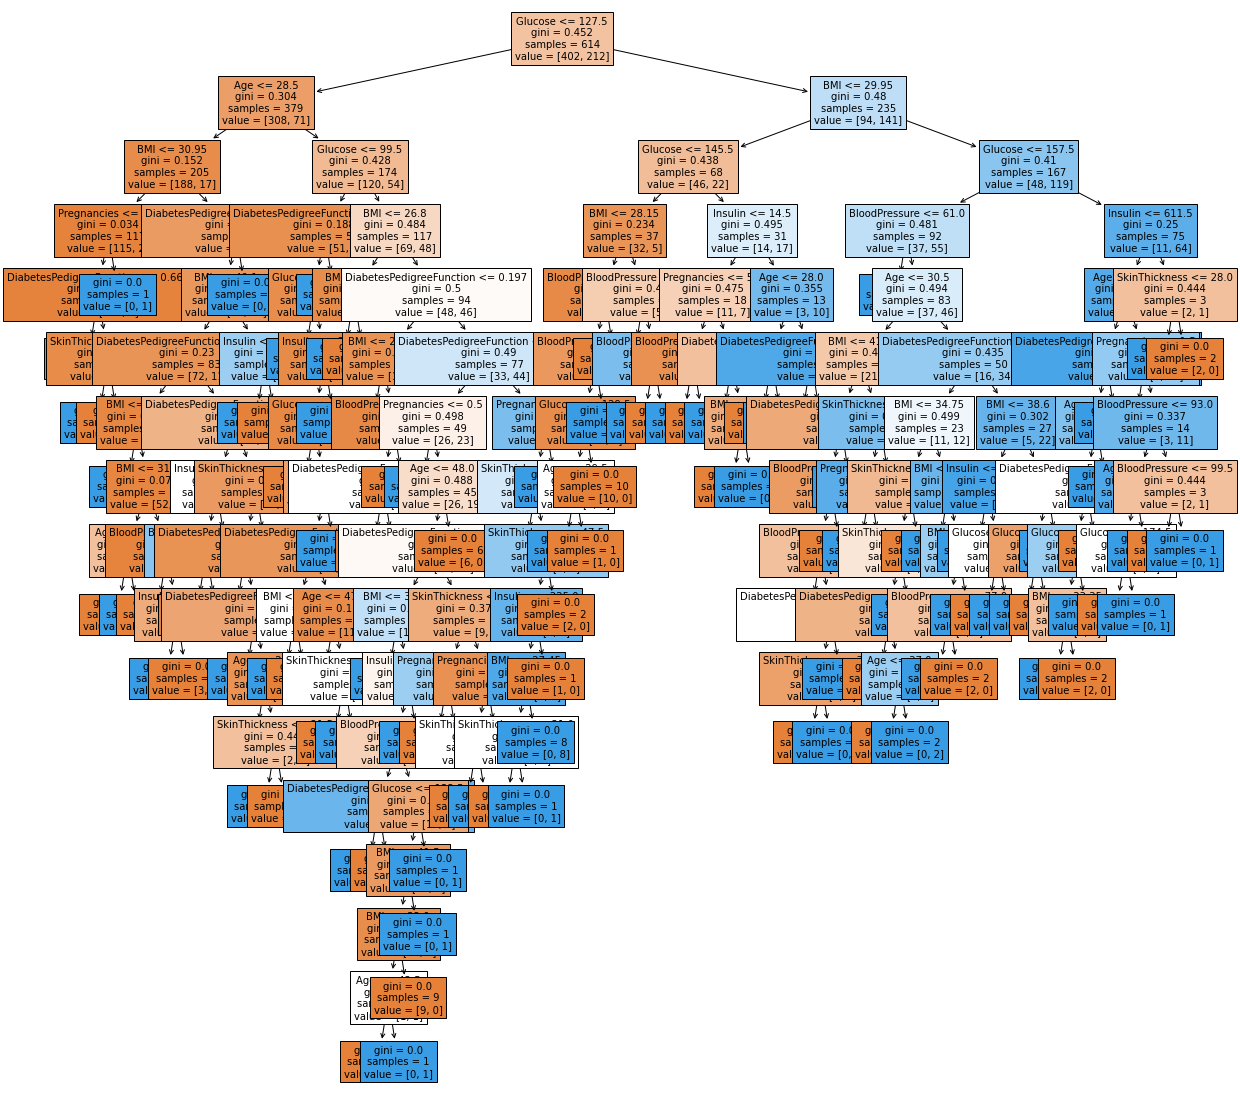

In [86]:
# 시각화하기.
from sklearn.tree import plot_tree

plt.figure(figsize = (20,20))
tree = plot_tree(model,
    feature_names=feature_names,
    filled = True,
    fontsize = 10)

In [72]:
model.feature_importances_

array([0.07224426, 0.31694145, 0.12283789, 0.04467326, 0.07334508,
       0.16387126, 0.12089291, 0.08519388])

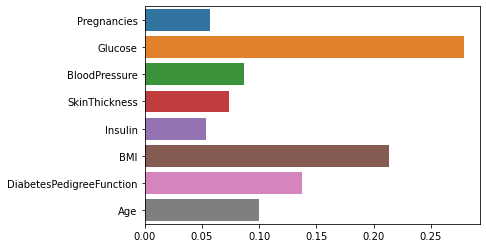

In [87]:
sns.barplot(x= model.feature_importances_, y=feature_names)